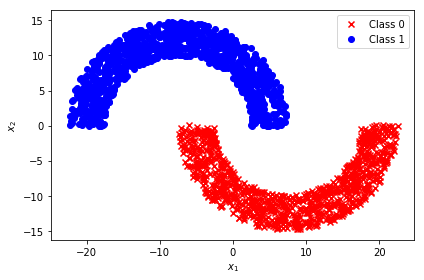

[Perceptron]
Misclassified samples: 4
Accuracy: 0.99
4


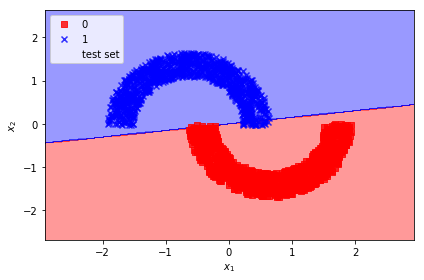

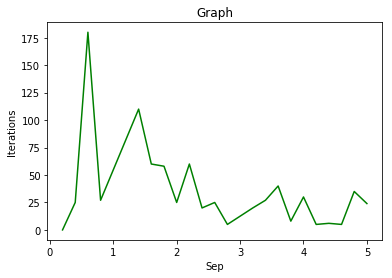

In [5]:
from IPython.display import Image
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from scipy import stats
from pylab import *


# inline plotting instead of popping out
%matplotlib inline

import os, sys
module_path = os.path.abspath(os.path.join('.'))
sys.path.append(module_path)
from Lib import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons

def versiontuple(version):
  return tuple(map(int, (version.split("."))))


n_data_points = 2000

rad = 10 
thk = 5
sep = 0.2
c1 = np.array([(rad+thk)/2, -sep/2])
c2 =  np.array([-(rad+thk)/2, sep/2])
r1 = np.random.rand(n_data_points)*thk+rad
a1 = np.random.rand(n_data_points)*np.pi

r2 = np.random.rand(n_data_points)*thk+rad
a2 = np.random.rand(n_data_points)*np.pi+np.pi

# In order to plot it we convert it to cartesian:
p1 = np.array((r1*np.cos(a1), r1*np.sin(a1)))
p2 = np.array((r2*np.cos(a2), r2*np.sin(a2)))
x1, y1 = (p1[0] - c1[0], p1[1] - c1[1])
x2, y2 = (p2[0] - c2[0], p2[1] - c2[1])

#ones
x3 = x1.reshape(n_data_points,-1)
y3 = y1.reshape(n_data_points,-1)
x3 = np.concatenate((x3,y3),axis=1)
y3 = np.full((1, n_data_points), 1, dtype=int)[0]

#zeros
x4 = x2.reshape(n_data_points,-1)
y4 = y2.reshape(n_data_points,-1)
x4 = np.concatenate((x4,y4),axis=1)
X = np.concatenate((x3,x4),axis=0)
y4 = np.full((1, n_data_points), 0, dtype=int)[0]
y = np.concatenate((y3,y4),axis=0)

plt.scatter(X[y == 0, 0], X[y == 0, 1],
            c='r', marker='x', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1],
            c='b', marker='o', label='Class 1')


plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='best')
plt.tight_layout()

plt.show()


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

ppn = Perceptron(tol=0.0001,eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('[Perceptron]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print(ppn.n_iter_)
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')
# plot decision regions for Perceptron
plot_decision_regions(X_combined_std, y_combined,
                      classifier=ppn, 
                      test_idx=range(y_train.size, 
                                     y_train.size + y_test.size))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()
Sep = np.array([0.2,0.4,0.6,0.8,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3.2,3.4,3.6,3.8,4,4.2,4.4,4.6,4.8,5])
Iterations = np.array([0.0,25,180,27,110,60,58,25,60,20,25,5,20,27,40,8,30,5,6,5,35,24])

plt.plot(Sep,Iterations, color='g')

plt.xlabel('Sep')
plt.ylabel('Iterations')
plt.title('Graph')
plt.show()
